# New book chapter 7 solutions

7.1: 5.  Solve  the  initial-value  problem  $x'  =  t + x  + x^2$ on  the interval  [0,1] with  initial  condition  x(1)  =  1.  Use  the  Taylor  series  method  of order  5.

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def taylor_polynomial(f, t0, x0):
    x_prime = f
    x_double_prime = sp.diff(f, t) + sp.diff(f, x) * f
    x_triple_prime = sp.diff(x_double_prime, t) + sp.diff(x_double_prime, x) * f
    x_quad_prime = sp.diff(x_triple_prime, t) + sp.diff(x_triple_prime, x) * f

    subs = {t: t0, x: x0}
    f1 = x_prime.subs(subs)
    f2 = x_double_prime.subs(subs)
    f3 = x_triple_prime.subs(subs)
    f4 = x_quad_prime.subs(subs)

    delta_t = sp.Symbol('h')
    taylor_poly = x0 + f1*delta_t + f2*delta_t**2/2 + f3*delta_t**3/6 + f4*delta_t**4/24
    taylor_poly = sp.simplify(taylor_poly)

    return taylor_poly

In [10]:
t, x = sp.symbols('t x')
f = t + x + x**2 

t0 = 1
x0 = 1

taylor_poly = taylor_polynomial(f, t0, x0)

print("Taylor polynomial of order 5 around t = 1:")
sp.pprint(taylor_poly)

Taylor polynomial of order 5 around t = 1:
    4                        
27⋅h       3      2          
───── + 8⋅h  + 5⋅h  + 3⋅h + 1
  2                          


In [7]:
# Example value
approx_value = taylor_poly.subs(delta_t, 0.9 - t0)
print("\nApproximate x(0.9) using 5th-order Taylor series:", approx_value.evalf())


Approximate x(0.9) using 5th-order Taylor series: 0.743350000000000


7.1: 9. Write  a program  to  solve  the  initial-value  problem  $x'  =  e^{t}x$  with $ x(2)  =  1$ on  the  interval  $0<t<2$  using the  Taylor  series  method.  Include  terms  up to  $h^4$.

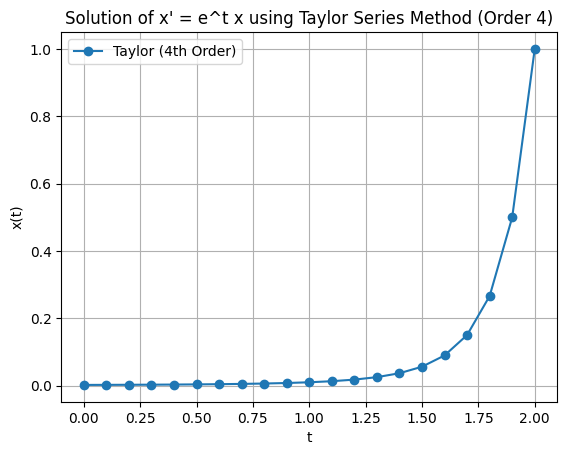

In [14]:
t, x = sp.symbols('t x')
f = sp.exp(t) * x 

x1 = f
x2 = sp.diff(x1, t) + sp.diff(x1, x)*f
x3 = sp.diff(x2, t) + sp.diff(x2, x)*f
x4 = sp.diff(x3, t) + sp.diff(x3, x)*f

f1 = sp.lambdify((t, x), x1, 'numpy')
f2 = sp.lambdify((t, x), x2, 'numpy')
f3 = sp.lambdify((t, x), x3, 'numpy')
f4 = sp.lambdify((t, x), x4, 'numpy')

def taylor_step(tn, xn, h):
    return xn + h*f1(tn, xn) + (h**2/2)*f2(tn, xn) + (h**3/6)*f3(tn, xn) + (h**4/24)*f4(tn, xn)

t0 = 2
x0 = 1
h = -0.1 
t_values = np.arange(2, -0.01, h)
x_values = [x0]

for tn in t_values[:-1]:
    xn = x_values[-1]
    x_next = taylor_step(tn, xn, h)
    x_values.append(x_next)

t_values = t_values[::-1]
x_values = x_values[::-1]

plt.plot(t_values, x_values, marker='o', label="Taylor (4th Order)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Solution of x' = e^t x using Taylor Series Method (Order 4)")
plt.grid(True)
plt.legend()
plt.show()


7.2: 2. Solve the initial-value problem $x' = \frac{x}{t} + t \sec(x/t)$ with $x(0) = 0$ by the fourth-order Runge-Kutta method. Continue the solution to $t = 1$ using step size $h = 2^{-7}$. Compare the numerical solution with the exact solution, which is $x(t) = t \arcsin t$. Define $f(0, 0) = 0$, where $f(t, x) = \frac{x}{t} + t \sec(x/t)$.

In [15]:
h = 2**-7
t_vals = np.arange(0, 1 + h, h)
n = len(t_vals)
x_vals = np.zeros(n)

def f(t, x):
    if t == 0:
        return 0
    return x / t + t * (1 / np.cos(x / t))

for i in range(n - 1):
    t = t_vals[i]
    x = x_vals[i]

    k1 = h * f(t, x)
    k2 = h * f(t + h / 2, x + k1 / 2)
    k3 = h * f(t + h / 2, x + k2 / 2)
    k4 = h * f(t + h, x + k3)

    x_vals[i + 1] = x + (k1 + 2*k2 + 2*k3 + k4) / 6

exact_x = t_vals * np.arcsin(t_vals)

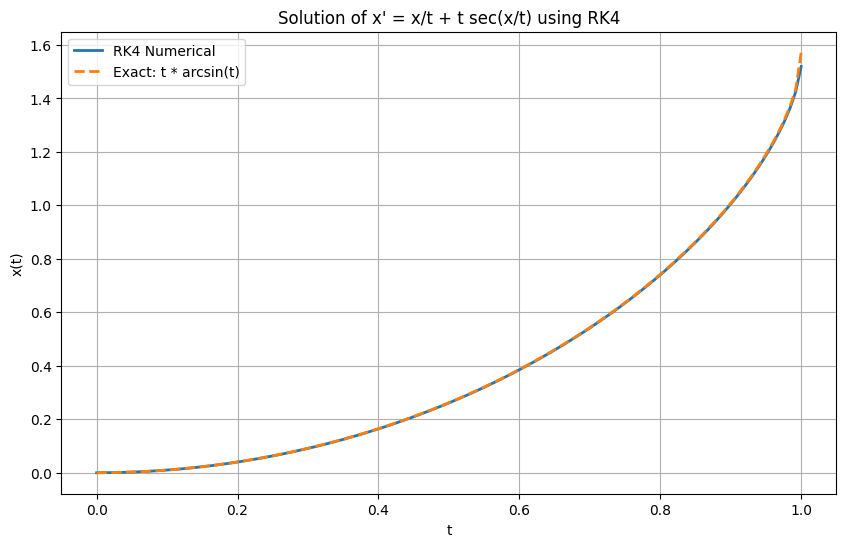

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(t_vals, x_vals, label='RK4 Numerical', lw=2)
plt.plot(t_vals, exact_x, '--', label='Exact: t * arcsin(t)', lw=2)
plt.title("Solution of x' = x/t + t sec(x/t) using RK4")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
error = np.abs(x_vals - exact_x)
print(f"Max absolute error: {np.max(error)}")

Max absolute error: 0.05167120631783062


7.2: 5. (Ill-Conditioned ODE) Solve the ordinary differential equation $x' = 10x + 11t - 5t^2 - 1$ with initial value $x(0) = 0$. Continue the solution from $t = 0$ to $t = 3$, using the fourth-order Runge-Kutta method with $h = 2^{-8}$. Print the numerical solution and the exact solution $\left(\frac{t^2}{2} - t\right)$ at every tenth step, and draw a graph of the two solutions. Verify that the solution of the same differential equation with initial value $x(0) = \varepsilon$ is $\varepsilon e^{10t} + \frac{t^2}{2} - t$ and thus account for the discrepancy between the numerical and exact solutions of the original problem.

In [22]:
def f(t, x):
    return 10 * x + 11 * t - 5 * t**2 - 1

def exact_solution(t):
    return t**2 / 2 - t

def exact_solution_perturbed(t, eps):
    return eps * np.exp(10 * t) + t**2 / 2 - t

def runge_kutta_4(f, x0, t0, t_end, h):
    t_values = [t0]
    x_values = [x0]
    t = t0
    x = x0
    while t < t_end:
        if t + h > t_end:
            h = t_end - t
        k1 = h * f(t, x)
        k2 = h * f(t + h/2, x + k1/2)
        k3 = h * f(t + h/2, x + k2/2)
        k4 = h * f(t + h, x + k3)
        x += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
        t_values.append(t)
        x_values.append(x)
    return np.array(t_values), np.array(x_values)

In [23]:
t0 = 0
t_end = 3
h = 2**-8
eps = 1e-8

t_vals, x_rk4 = runge_kutta_4(f, 0, t0, t_end, h)
_, x_rk4_eps = runge_kutta_4(f, eps, t0, t_end, h)

x_exact = exact_solution(t_vals)
x_exact_eps = exact_solution_perturbed(t_vals, eps)

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Kanak Sanghvi\AppData\Local\Temp\ipykernel_23360\2639643071.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(t_vals, x_rk4_eps, label=f'RK4: $x(0)=\epsilon={eps}$', linestyle='--')
C:\Users\Kanak Sanghvi\AppData\Local\Temp\ipykernel_23360\2639643071.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(t_vals, x_exact_eps, label='Exact: $x(0)=\epsilon$', alpha=0.6)


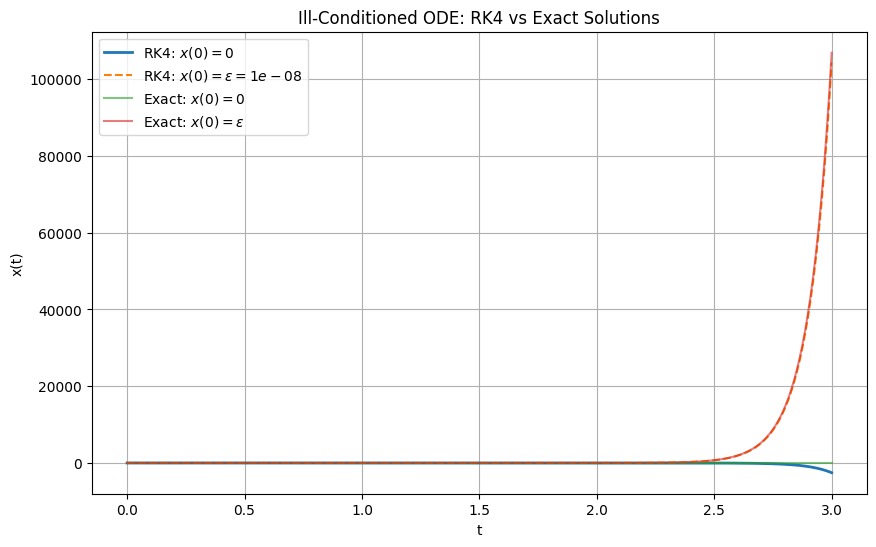

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(t_vals, x_rk4, label='RK4: $x(0)=0$', linewidth=2)
plt.plot(t_vals, x_rk4_eps, label=f'RK4: $x(0)=\epsilon={eps}$', linestyle='--')
plt.plot(t_vals, x_exact, label='Exact: $x(0)=0$', alpha=0.6)
plt.plot(t_vals, x_exact_eps, label='Exact: $x(0)=\epsilon$', alpha=0.6)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Ill-Conditioned ODE: RK4 vs Exact Solutions')
plt.legend()
plt.grid(True)
plt.show()

The discrepancy between the numerical and exact solution arises because the general solution of the ODE is $x(t) = Ce^{10t} + \frac{t^2}{2} - t$. When $x(0) = 0$, we get $C = 0$, so the solution reduces to $x(t) = \frac{t^2}{2} - t$. However, in numerical computations, it is almost impossible to maintain $C = 0$ exactly due to round-off errors or small perturbations. If even a tiny error $\varepsilon$ is introduced, the solution becomes $x(t) = \varepsilon e^{10t} + \frac{t^2}{2} - t$. The term $\varepsilon e^{10t}$ grows extremely fast with $t$, and eventually dominates the solution. For example, at $t = 3$, $\varepsilon e^{30} \approx 10^{-8} \cdot 10^{13} = 10^5$, which completely overwhelms the polynomial part. Thus, the problem is ill-conditioned: small changes in initial conditions lead to large deviations in the solution, and even stable numerical methods like RK4 cannot prevent this divergence.